#**Skill: PySpark**
If your agenda is one of the following, please follow along this notebook to learn PySpark skill:
- Want to learn PySpark? 
- Have a huge dataset and want to do analysis to extract insights from it?
- Want to become a Data Engineer?

**Background**:   
[PySpark](https://spark.apache.org/docs/latest/api/python/) is an interface for Apache Spark in Python. It not only allows you to write Spark applications using Python APIs, but also provides the PySpark shell for interactively analyzing your data in a distributed environment. PySpark supports most of Spark’s features such as Spark SQL, DataFrame, Streaming, MLlib (Machine Learning) and Spark Core.    

In this notebook, we will try to answer few questions to learn PySpark. Let's practice!

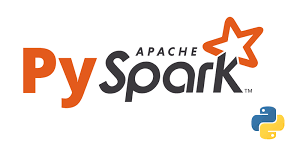

First, we will get data, employees.csv file from the [link](https://gist.githubusercontent.com/kevin336/acbb2271e66c10a5b73aacf82ca82784/raw/e38afe62e088394d61ed30884dd50a6826eee0a8/employees.csv).   
The below command will get data and save it in _data folder

In [8]:
#!wget "https://gist.githubusercontent.com/kevin336/acbb2271e66c10a5b73aacf82ca82784/raw/e38afe62e088394d61ed30884dd50a6826eee0a8/employees.csv" -O /workspaces/pyspark-practice/_data/employees.csv

--2023-02-02 14:26:23--  https://gist.githubusercontent.com/kevin336/acbb2271e66c10a5b73aacf82ca82784/raw/e38afe62e088394d61ed30884dd50a6826eee0a8/employees.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3778 (3.7K) [text/plain]
Saving to: ‘/workspaces/pyspark-practice/_data/employees.csv’

/workspaces/pyspark 100%[===================>]   3.69K  --.-KB/s    in 0s      

2023-02-02 14:26:23 (44.8 MB/s) - ‘/workspaces/pyspark-practice/_data/employees.csv’ saved [3778/3778]



Install PySpark in this notebook

In [9]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 5.4 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 kB 8.9 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=268f04df7b060df0c9d8ee6b8d4679bdfeb2265d98ae1b5b6baf04ad3e06a98e
  Stored in directory: /home/codespace/.cache/pip/wheels/9c/aa/b1/8433fd8b1afe7eb31196cc74a42cd778bcb52636a428da079d
Successfully built pyspark

[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python -m pip install --upgrade pip


## Introduction
[Apache Spark](https://sparkbyexamples.com/pyspark/what-is-pyspark-and-who-uses-it/) is an open-source framework written in Scala for processing large datasets in a distributed manner (in a cluster). Spark runs 100 times faster than traditional processing due to its in-memory processing. PySpark is a Python API for Apache Spark to process larger datasets in a distributed cluster. It is written in Python to run a Python application using Apache Spark capabilities. 

[The entry point](https://spark.apache.org/docs/latest/sql-getting-started.html) into all functionality in Spark is the SparkSession class. To create a basic SparkSession, just use SparkSession.builder. 

In [10]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

23/02/02 14:36:07 WARN Utils: Your hostname, codespaces-53d0de resolves to a loopback address: 127.0.0.1; using 172.16.5.4 instead (on interface eth0)
23/02/02 14:36:07 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/02/02 14:36:08 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


The below command is used to read the csv dataset with header  *header = True*.    
*inferSchema = True* defines the datatype of a column and we don't have to explicitly define schema of the dataset. 

In [25]:
df = spark.read.csv("_data/employees.csv", header=True, inferSchema=True)
df.show(20)

+-----------+----------+---------+--------+------------+---------+----------+------+--------------+----------+-------------+
|EMPLOYEE_ID|FIRST_NAME|LAST_NAME|   EMAIL|PHONE_NUMBER|HIRE_DATE|    JOB_ID|SALARY|COMMISSION_PCT|MANAGER_ID|DEPARTMENT_ID|
+-----------+----------+---------+--------+------------+---------+----------+------+--------------+----------+-------------+
|        198|    Donald| OConnell|DOCONNEL|650.507.9833|21-JUN-07|  SH_CLERK|  2600|            - |       124|           50|
|        199|   Douglas|    Grant|  DGRANT|650.507.9844|13-JAN-08|  SH_CLERK|  2600|            - |       124|           50|
|        200|  Jennifer|   Whalen| JWHALEN|515.123.4444|17-SEP-03|   AD_ASST|  4400|            - |       101|           10|
|        201|   Michael|Hartstein|MHARTSTE|515.123.5555|17-FEB-04|    MK_MAN| 13000|            - |       100|           20|
|        202|       Pat|      Fay|    PFAY|603.123.6666|17-AUG-05|    MK_REP|  6000|            - |       201|           20|


Let's check how the spark has defined the datatype of columns.

In [26]:
df.printSchema()

root
 |-- EMPLOYEE_ID: integer (nullable = true)
 |-- FIRST_NAME: string (nullable = true)
 |-- LAST_NAME: string (nullable = true)
 |-- EMAIL: string (nullable = true)
 |-- PHONE_NUMBER: string (nullable = true)
 |-- HIRE_DATE: string (nullable = true)
 |-- JOB_ID: string (nullable = true)
 |-- SALARY: integer (nullable = true)
 |-- COMMISSION_PCT: string (nullable = true)
 |-- MANAGER_ID: string (nullable = true)
 |-- DEPARTMENT_ID: integer (nullable = true)



**Business Requirement 1: Take “EMPLOYEE_ID” “FIRST_NAME” to new Data Frame along with “JOINING_DATE” (in yyyy-MM-dd ) same as “HIRE_DATE”**

In this question, we are trying to select three columns(employee_id, first_name, hire_date) and format hire_date in yyyy-MM-dd format and alias it as Joining_date

In [27]:
from pyspark.sql.functions import date_format, to_date
df_joining_date = df.select(["EMPLOYEE_ID", "FIRST_NAME", \
           date_format(to_date(df.HIRE_DATE, "dd-MMM-yy"), "yyyy-MM-dd").alias("JOINING_DATE")])

df_joining_date.show(20)

+-----------+----------+------------+
|EMPLOYEE_ID|FIRST_NAME|JOINING_DATE|
+-----------+----------+------------+
|        198|    Donald|  2007-06-21|
|        199|   Douglas|  2008-01-13|
|        200|  Jennifer|  2003-09-17|
|        201|   Michael|  2004-02-17|
|        202|       Pat|  2005-08-17|
|        203|     Susan|  2002-06-07|
|        204|   Hermann|  2002-06-07|
|        205|   Shelley|  2002-06-07|
|        206|   William|  2002-06-07|
|        100|    Steven|  2003-06-17|
|        101|     Neena|  2005-09-21|
|        102|       Lex|  2001-01-13|
|        103| Alexander|  2006-01-03|
|        104|     Bruce|  2007-05-21|
|        105|     David|  2005-06-25|
|        106|     Valli|  2006-02-05|
|        107|     Diana|  2007-02-07|
|        108|     Nancy|  2002-08-17|
|        109|    Daniel|  2002-08-16|
|        110|      John|  2005-09-28|
+-----------+----------+------------+
only showing top 20 rows



**Business Requirement 2: Print the experience of employees in terms of days based on employee's joining date along with employee_id, first_name and their joining_date**

Based on our business requirement, we have to retrieve experience of employees in days and we are going to achieve this by taking difference between current_date and their joining date.    
We will use [datediff()](https://sparkbyexamples.com/pyspark/pyspark-difference-between-two-dates-days-months-years/) and [current_date()](https://sparkbyexamples.com/pyspark/pyspark-current-date-timestamp/) functions from PySpark SQL library.

In [28]:
from pyspark.sql.functions import datediff, current_date

datediff_df = df_joining_date.withColumn("Exp_in_days", datediff(current_date(), df_joining_date.JOINING_DATE))
datediff_df.show(20)

+-----------+----------+------------+-----------+
|EMPLOYEE_ID|FIRST_NAME|JOINING_DATE|Exp_in_days|
+-----------+----------+------------+-----------+
|        198|    Donald|  2007-06-21|       5705|
|        199|   Douglas|  2008-01-13|       5499|
|        200|  Jennifer|  2003-09-17|       7078|
|        201|   Michael|  2004-02-17|       6925|
|        202|       Pat|  2005-08-17|       6378|
|        203|     Susan|  2002-06-07|       7545|
|        204|   Hermann|  2002-06-07|       7545|
|        205|   Shelley|  2002-06-07|       7545|
|        206|   William|  2002-06-07|       7545|
|        100|    Steven|  2003-06-17|       7170|
|        101|     Neena|  2005-09-21|       6343|
|        102|       Lex|  2001-01-13|       8055|
|        103| Alexander|  2006-01-03|       6239|
|        104|     Bruce|  2007-05-21|       5736|
|        105|     David|  2005-06-25|       6431|
|        106|     Valli|  2006-02-05|       6206|
|        107|     Diana|  2007-02-07|       5839|


**Business Requirement 3: Get the employees work experience in months and print FIRST_NAME|EMPLOYEE_ID|JOINING_DATE|Exp_in_months**

Similar to the datediff() function, we have months_between() function in PySpark SQL library where it will give us the number of months in between two dates.

In [29]:
from pyspark.sql.functions import months_between, current_date

monthdiff_df = df_joining_date.withColumn("Exp_in_months", months_between(current_date(), df_joining_date.JOINING_DATE))
monthdiff_df.show(20)

+-----------+----------+------------+-------------+
|EMPLOYEE_ID|FIRST_NAME|JOINING_DATE|Exp_in_months|
+-----------+----------+------------+-------------+
|        198|    Donald|  2007-06-21| 187.38709677|
|        199|   Douglas|  2008-01-13| 180.64516129|
|        200|  Jennifer|  2003-09-17| 232.51612903|
|        201|   Michael|  2004-02-17| 227.51612903|
|        202|       Pat|  2005-08-17| 209.51612903|
|        203|     Susan|  2002-06-07| 247.83870968|
|        204|   Hermann|  2002-06-07| 247.83870968|
|        205|   Shelley|  2002-06-07| 247.83870968|
|        206|   William|  2002-06-07| 247.83870968|
|        100|    Steven|  2003-06-17| 235.51612903|
|        101|     Neena|  2005-09-21| 208.38709677|
|        102|       Lex|  2001-01-13| 264.64516129|
|        103| Alexander|  2006-01-03| 204.96774194|
|        104|     Bruce|  2007-05-21| 188.38709677|
|        105|     David|  2005-06-25| 211.25806452|
|        106|     Valli|  2006-02-05| 203.90322581|
|        107

**Business Requirement 4: By policy, employee will be promoted after 20 months of their joining. Get the employees promotion date and print their FIRST_NAME|EMPLOYEE_ID|JOINING_DATE|Promotion Date**

Spark SQL provides DataFrame function [add_months()](https://sparkbyexamples.com/spark/spark-functions-adding-days-months-year/) to add or subtract months from a Date Column

In [30]:
from pyspark.sql.functions import add_months

promotion_df = df_joining_date.withColumn("PROMOTION_DATE", \
                                          add_months(df_joining_date.JOINING_DATE, 20)
                                          )

promotion_df.show()

+-----------+----------+------------+--------------+
|EMPLOYEE_ID|FIRST_NAME|JOINING_DATE|PROMOTION_DATE|
+-----------+----------+------------+--------------+
|        198|    Donald|  2007-06-21|    2009-02-21|
|        199|   Douglas|  2008-01-13|    2009-09-13|
|        200|  Jennifer|  2003-09-17|    2005-05-17|
|        201|   Michael|  2004-02-17|    2005-10-17|
|        202|       Pat|  2005-08-17|    2007-04-17|
|        203|     Susan|  2002-06-07|    2004-02-07|
|        204|   Hermann|  2002-06-07|    2004-02-07|
|        205|   Shelley|  2002-06-07|    2004-02-07|
|        206|   William|  2002-06-07|    2004-02-07|
|        100|    Steven|  2003-06-17|    2005-02-17|
|        101|     Neena|  2005-09-21|    2007-05-21|
|        102|       Lex|  2001-01-13|    2002-09-13|
|        103| Alexander|  2006-01-03|    2007-09-03|
|        104|     Bruce|  2007-05-21|    2009-01-21|
|        105|     David|  2005-06-25|    2007-02-25|
|        106|     Valli|  2006-02-05|    2007-

**Business Requirement 5: Employee will be onboarded to a project after 7 days of their joining. Get the employees project onboarding date and print their FIRST_NAME|EMPLOYEE_ID|JOINING_DATE|Project_OnBoarding**

Similar to the above add_months() function, we have date_add() to add number of days to a date column

In [31]:
from pyspark.sql.functions import date_add

proj_onboarding_df = df_joining_date.withColumn("PROJECT_ONBOARDING", \
                                                date_add(df_joining_date.JOINING_DATE, 7))

proj_onboarding_df.show(20)

+-----------+----------+------------+------------------+
|EMPLOYEE_ID|FIRST_NAME|JOINING_DATE|PROJECT_ONBOARDING|
+-----------+----------+------------+------------------+
|        198|    Donald|  2007-06-21|        2007-06-28|
|        199|   Douglas|  2008-01-13|        2008-01-20|
|        200|  Jennifer|  2003-09-17|        2003-09-24|
|        201|   Michael|  2004-02-17|        2004-02-24|
|        202|       Pat|  2005-08-17|        2005-08-24|
|        203|     Susan|  2002-06-07|        2002-06-14|
|        204|   Hermann|  2002-06-07|        2002-06-14|
|        205|   Shelley|  2002-06-07|        2002-06-14|
|        206|   William|  2002-06-07|        2002-06-14|
|        100|    Steven|  2003-06-17|        2003-06-24|
|        101|     Neena|  2005-09-21|        2005-09-28|
|        102|       Lex|  2001-01-13|        2001-01-20|
|        103| Alexander|  2006-01-03|        2006-01-10|
|        104|     Bruce|  2007-05-21|        2007-05-28|
|        105|     David|  2005-

**Business Requirement 6: Get the date on which employees received their offer letter. By policy, employees will receive their joining letter 15 days post to their offer letter date, and print their FIRST_NAME|EMPLOYEE_ID|JOINING_DATE|Offer_letter**

Similar to the above add_months() function, we have date_sub() to substract number of days from a date column

In [32]:
from pyspark.sql.functions import date_sub

offer_letter_df = df_joining_date.withColumn("OFFER_LETTER", \
                                             date_sub(df_joining_date.JOINING_DATE, 15))

offer_letter_df.show(20)

+-----------+----------+------------+------------+
|EMPLOYEE_ID|FIRST_NAME|JOINING_DATE|OFFER_LETTER|
+-----------+----------+------------+------------+
|        198|    Donald|  2007-06-21|  2007-06-06|
|        199|   Douglas|  2008-01-13|  2007-12-29|
|        200|  Jennifer|  2003-09-17|  2003-09-02|
|        201|   Michael|  2004-02-17|  2004-02-02|
|        202|       Pat|  2005-08-17|  2005-08-02|
|        203|     Susan|  2002-06-07|  2002-05-23|
|        204|   Hermann|  2002-06-07|  2002-05-23|
|        205|   Shelley|  2002-06-07|  2002-05-23|
|        206|   William|  2002-06-07|  2002-05-23|
|        100|    Steven|  2003-06-17|  2003-06-02|
|        101|     Neena|  2005-09-21|  2005-09-06|
|        102|       Lex|  2001-01-13|  2000-12-29|
|        103| Alexander|  2006-01-03|  2005-12-19|
|        104|     Bruce|  2007-05-21|  2007-05-06|
|        105|     David|  2005-06-25|  2005-06-10|
|        106|     Valli|  2006-02-05|  2006-01-21|
|        107|     Diana|  2007-

**Business Requirement 7: Get the year of employee’s joining date**

In the same library as above, we have [year()](https://sparkbyexamples.com/pyspark/pyspark-sql-date-and-timestamp-functions/) function with will retrive the year from a date column yyyy-MM-dd

In [34]:
from pyspark.sql.functions import year

year_of_joining_df = df_joining_date.withColumn("YEAR_OF_JOINING", \
                                                year(df_joining_date.JOINING_DATE))

year_of_joining_df.show(20)

+-----------+----------+------------+---------------+
|EMPLOYEE_ID|FIRST_NAME|JOINING_DATE|YEAR_OF_JOINING|
+-----------+----------+------------+---------------+
|        198|    Donald|  2007-06-21|           2007|
|        199|   Douglas|  2008-01-13|           2008|
|        200|  Jennifer|  2003-09-17|           2003|
|        201|   Michael|  2004-02-17|           2004|
|        202|       Pat|  2005-08-17|           2005|
|        203|     Susan|  2002-06-07|           2002|
|        204|   Hermann|  2002-06-07|           2002|
|        205|   Shelley|  2002-06-07|           2002|
|        206|   William|  2002-06-07|           2002|
|        100|    Steven|  2003-06-17|           2003|
|        101|     Neena|  2005-09-21|           2005|
|        102|       Lex|  2001-01-13|           2001|
|        103| Alexander|  2006-01-03|           2006|
|        104|     Bruce|  2007-05-21|           2007|
|        105|     David|  2005-06-25|           2005|
|        106|     Valli|  20

**Business Requirement 8: Get the month on which employees joined and get their FIRST_NAME|EMPLOYEE_ID|JOINING_DATE|month_of_joining**

Similar to year() function, we have month() function to retrieve month from a date column. We can print the month number and month name as well. Here's how to do it...

In [35]:
from pyspark.sql.functions import month, date_format

month_of_joining_df = df_joining_date.withColumn("MONTH_OF_JOINING", \
                                                 month(df_joining_date.JOINING_DATE)) \
                                                 .withColumn("MONTH_NAME_OF_JOINING", \
                                                 date_format(df_joining_date.JOINING_DATE, "MMM"))

month_of_joining_df.show()

+-----------+----------+------------+----------------+---------------------+
|EMPLOYEE_ID|FIRST_NAME|JOINING_DATE|MONTH_OF_JOINING|MONTH_NAME_OF_JOINING|
+-----------+----------+------------+----------------+---------------------+
|        198|    Donald|  2007-06-21|               6|                  Jun|
|        199|   Douglas|  2008-01-13|               1|                  Jan|
|        200|  Jennifer|  2003-09-17|               9|                  Sep|
|        201|   Michael|  2004-02-17|               2|                  Feb|
|        202|       Pat|  2005-08-17|               8|                  Aug|
|        203|     Susan|  2002-06-07|               6|                  Jun|
|        204|   Hermann|  2002-06-07|               6|                  Jun|
|        205|   Shelley|  2002-06-07|               6|                  Jun|
|        206|   William|  2002-06-07|               6|                  Jun|
|        100|    Steven|  2003-06-17|               6|                  Jun|

**Business Requirement 9: Project KT is being given on the immediate Monday of employee's joining date. Get the date on which employee's received their project KT and print FIRST_NAME|EMPLOYEE_ID|JOINING_DATE|Project_KT**

Here's the tricky question. We could use [next_day()](https://spark.apache.org/docs/3.1.1/api/python/reference/api/pyspark.sql.functions.next_day.html) function from PySpark SQL library to return the first date which is later than the value of the date column. 

In [36]:
from pyspark.sql.functions import next_day

proj_kt_df = df_joining_date.withColumn("PROJECT_KT", \
                                        next_day(df_joining_date.JOINING_DATE, "Monday"))

proj_kt_df.show()

+-----------+----------+------------+----------+
|EMPLOYEE_ID|FIRST_NAME|JOINING_DATE|PROJECT_KT|
+-----------+----------+------------+----------+
|        198|    Donald|  2007-06-21|2007-06-25|
|        199|   Douglas|  2008-01-13|2008-01-14|
|        200|  Jennifer|  2003-09-17|2003-09-22|
|        201|   Michael|  2004-02-17|2004-02-23|
|        202|       Pat|  2005-08-17|2005-08-22|
|        203|     Susan|  2002-06-07|2002-06-10|
|        204|   Hermann|  2002-06-07|2002-06-10|
|        205|   Shelley|  2002-06-07|2002-06-10|
|        206|   William|  2002-06-07|2002-06-10|
|        100|    Steven|  2003-06-17|2003-06-23|
|        101|     Neena|  2005-09-21|2005-09-26|
|        102|       Lex|  2001-01-13|2001-01-15|
|        103| Alexander|  2006-01-03|2006-01-09|
|        104|     Bruce|  2007-05-21|2007-05-28|
|        105|     David|  2005-06-25|2005-06-27|
|        106|     Valli|  2006-02-05|2006-02-06|
|        107|     Diana|  2007-02-07|2007-02-12|
|        108|     Na

In [37]:
#THIS EMPTY CELL IS LEFT INTENTIONALLY



---


    
    
    Thank you. I hope this notebook helps you!